# BCI homework

# Brain-Computer Interfaces (Fall 2017, ELE 594)
# Instructor: Yalda Shahriari

# 1st homework, 9/23/17 (The homework, is due by Oct 4, 11:55 pm).

# Instruction: 
Load the “sampleEEGdata” into your Matlab workspace. 
This EEG dataset contains 64 channels (EEG.nbchan), 640 time points (EEG.pnts), and 99 trials (EEG.trials). 
The time points in ms has been saved in EEG.times where you can see each trial has been started 
from -1000 ms and ends at ~1500 ms. 
Use the topoplot.m function for plotting the head plots. 
Save the ‘eloc64C2.txt’ file in the same directory as the topoplot.m function for further analysis. 

In [18]:
# Here are the functions, 
# which reconstructs the dictionaries just use this loadmat instead of scipy.io's loadmat:

import scipy.io as spio
import numpy as np

sampleEEGdata = spio.loadmat('sampleEEGdata.mat')  #.loa ('sampleEEGdata.mat')
# sampleEEGdata['EEG'][0, 0].dtype
eeg = sampleEEGdata['EEG'][0, 0]
eeg.dtype

dtype([('setname', 'O'), ('filename', 'O'), ('filepath', 'O'), ('subject', 'O'), ('group', 'O'), ('condition', 'O'), ('session', 'O'), ('comments', 'O'), ('nbchan', 'O'), ('trials', 'O'), ('pnts', 'O'), ('srate', 'O'), ('xmin', 'O'), ('xmax', 'O'), ('times', 'O'), ('data', 'O'), ('icaact', 'O'), ('icawinv', 'O'), ('icasphere', 'O'), ('icaweights', 'O'), ('icachansind', 'O'), ('chanlocs', 'O'), ('urchanlocs', 'O'), ('chaninfo', 'O'), ('ref', 'O'), ('event', 'O'), ('urevent', 'O'), ('eventdescription', 'O'), ('epoch', 'O'), ('epochdescription', 'O'), ('reject', 'O'), ('stats', 'O'), ('specdata', 'O'), ('specicaact', 'O'), ('splinefile', 'O'), ('icasplinefile', 'O'), ('dipfit', 'O'), ('history', 'O'), ('saved', 'O'), ('etc', 'O'), ('spedata', 'O')])

In [26]:
# Use the topoplot.m function for plotting the head plots.
# Creating mne Objects from numpy arrays for Visualizing the epochs/ topomap plot
import mne as mne

labels = []
XYZs = []
eeg['chanlocs']['labels'][0, 0][0]
eeg['chanlocs']['labels'].shape[1]
for idx in range(eeg['chanlocs']['labels'].shape[1]):
    # channel labels or electrode labels
    label = eeg['chanlocs']['labels'][0, idx][0]
    #     print(label)
    labels.append(label)
    
    # channel location or electrode location
    X = eeg['chanlocs']['X'][0, idx][0][0]
    Y = eeg['chanlocs']['Y'][0, idx][0][0]
    Z = eeg['chanlocs']['Z'][0, idx][0][0]
    XYZs.append(np.array([X, Y, Z], dtype=float))

ch_location = np.array(XYZs, dtype=float) # channels or electrodes location
ch_names = labels # mat['ch_names'].tolist(): channels or electrodes names/ labels
dig_ch_pos = dict(zip(ch_names, ch_location))
montage = mne.channels.DigMontage(dig_ch_pos=dig_ch_pos)

sfreq = eeg['srate'][0, 0]

# It is also possible to use info from another raw object.
info = mne.create_info(ch_names=ch_names, ch_types='eeg', montage=montage, sfreq=sfreq)

# eeg['data'][0, 0, 0]: channels, time, epochs
data = eeg['data'].transpose(2, 0, 1) # epcohs/ trials, channels, time
# data.shape  # data : array, shape (n_epochs, n_channels, n_times)

tmin = eeg['xmin'][0, 0]
tmax = eeg['xmax'][0, 0]
picks = mne.pick_types(info=info, eeg=True)

# Visualizing the epochs/ topomap plot
epochs = mne.EpochsArray(data=data, info=info, tmin=tmin)

# Shrinking the data from 3 axis or 3 dim to 2 dim or getting rid of epochs/trials
evoked = epochs.average(picks=picks)
data2 = evoked.data
data2.shape

99 matching events found
0 projection items activated
0 bad epochs dropped


(64, 640)

In [27]:
# Save the ‘eloc64C2.txt’ file in the same directory as the topoplot.m function for further analysis.
% ls

.ipynb_checkpoints/           bci-hw1-Copy3.ipynb
Analyzing_Neural_Time_Series/ bci-hw1-Copy4.ipynb
Channel Description.txt*      bci-hw1.ipynb
HW1.pdf                       eloc64C2.txt*
README                        mne_examples/
bci-hw1-Copy1.ipynb           sampleEEGdata.mat*
bci-hw1-Copy2.ipynb           topoplot.m*


# 1-

In [77]:
# a) Extract epochs from 0 to 800 ms.

# Compute the ERPs at each electrode.
# ERP: Event-related Potentials
# ERF: Event-related Field

# Get the average over all the trials. 

# Select nine time points at which to show topographical plots (e.g., 0 to 800 ms in 100- ms steps). 

# In one figure, make a series of topographical plots at these time points. 

# To increase the signal-to-noise ratio (SNR), make each plot show the average of activity from 20 ms before 
# until 20 ms after each time point. 

# For example, the topographical plot from 200 ms should show average activity from 180 ms until 220 ms. 

# Indicate the center time point in a title on each subplot., tmax

(64, 204)


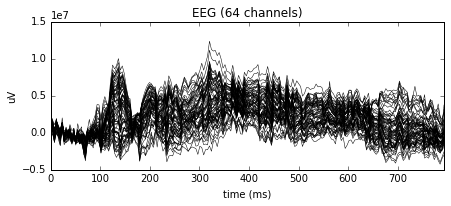

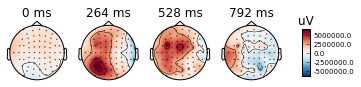

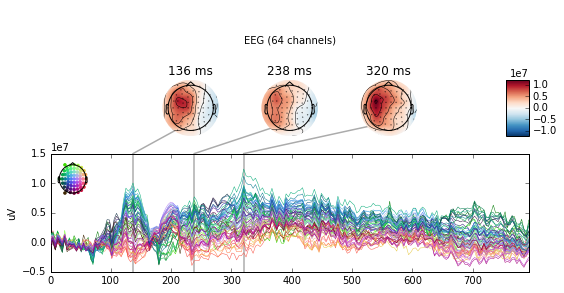

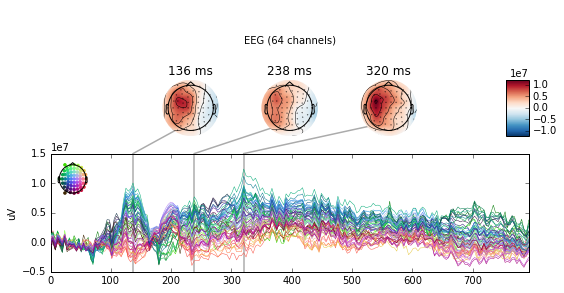

In [128]:
# data.shape, tmin, tmax, sfreq
# 1/ eeg['srate'] is time distance or period between each point
# the window limit, lower limit and the upper limit for extracting the pochs
tmin, tmax = 0.0, 0.792969 # slightly less than 0.8
roi_low, roi_length = 1.0 * sfreq, 0.8 * sfreq
roi_low, roi_length = int(roi_low), int(roi_length)
roi_low, roi_length, data.shape, (roi_low + roi_length)

# # data_extracted using the lower limit and upper limit of the region of interest (ROI) or window of interest
data3 = data2[:, roi_low: (roi_low + roi_length)]
print(data3.shape)

# for idx in range(num_steps):
evoked = mne.EvokedArray(data=data3, info=info) 
evoked.plot(picks=picks) # This kills it or empty out the data
evoked.plot_topomap()
evoked.plot_joint()

0.02
0.1059375
0.191875
0.2778125
0.36375
0.4496875
0.535625
0.6215625
0.7075


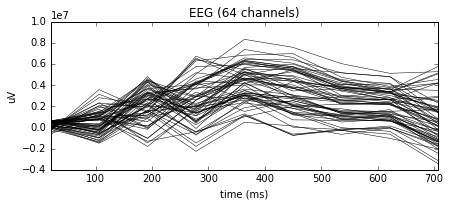

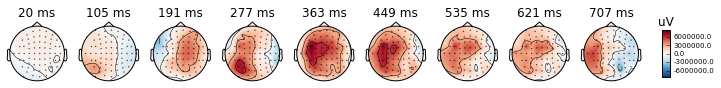

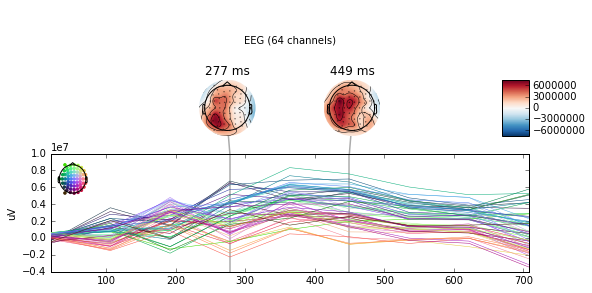

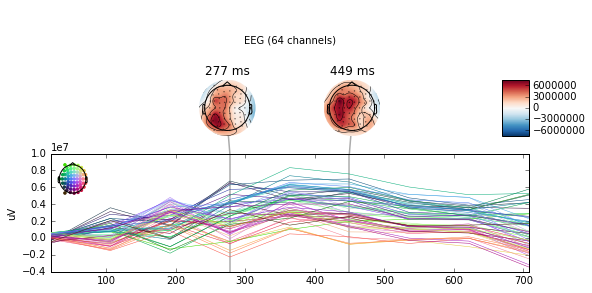

In [130]:
# Shrink the data to 64 x 8
# this is only one epoch/ averaged epoch of all epochs
num_samples = data3.shape[1] # chxtime or hxw
# print(num_samples)
num_steps = 9
step_size = num_samples // num_steps
# print(step_size, num_samples)
margin = int(0.02 * sfreq)
# print(margin)

data4 = []
times = []
for idx in range(num_steps):
    data = data3[:, (idx * step_size) : (idx * step_size) + (2 * margin)]
    data4.append(data)
    time = (idx * step_size * (1/ sfreq)) + 0.02
    times.append(time)
    print(time)

data4 = np.array(data4, dtype=float).transpose(2, 0, 1).mean(axis=0).T
# print(data4.shape)
times = np.array(times, dtype=float)
# # print(times.shape)

# for idx in range(num_steps):
evoked = mne.EvokedArray(data=data4, info=info) 
evoked.times = times
evoked.plot(picks=picks) # This kills it or empty out the data

# # picks
# # print(data4.shape[0])
# # Show the topoplot at every 9 timestamps
# # times = evoked.times.copy()
evoked.plot_topomap(times=times)
evoked.plot_joint()

In [100]:
# b) Loop through each electrode and find the peak time of the ERP between 100 and 800 ms.
# Store these peak times in a separate variable and then make a topographical plot of the peak times
# (that is, the topographical map will illustrate times in milliseconds, not activity at peak times).

# Include a color bar in the figure and make sure to show times in milliseconds from time 0 (not, for
# example, time indices instead of milliseconds).

# What areas of the scalp show the earliest and the latest peak responses to the stimulus within this window?

In [101]:
# import matplotlib as mpl

# data_roi_ERP = evoked_roi.data
# data_roi_ERP.shape
# peak_times = []
# for each in data_roi_ERP:
# #     print(each.shape)
#     idx = each.argmax()
# #     print(each.max(), each[idx])
#     peak_times.append(idx)
    
# peak_times = np.array(peak_times, dtype=int)
# mpl.pyplot.plot(peak_times, label='peak times in miliseconds')
# mpl.pyplot.legend()
# mpl.pyplot.show()

In [133]:
# c) Repeat step (a) by applying large Laplacian filter.

# Compare step (c) with step (a) and clearly explain your observations and comments 
# (hint: To obtain the distance
# and the surrounding electrodes, transfer the polar coordinates in eloc64C2.txt file into Cartesian.
                                                                                   
# Then for each electrode of interest keep those electrodes that are in radius [0.18 0.28], 
# remove the rest, continue obtaining your weights, and then the Laplacian filtered signal). 

In [ ]:
# (Note: Make the colormaps in ‘jet’ format and keep the color limit for all the topoplots and for
# each section the same).

# 2-

In [134]:
# a) Create a family of complex Morlet wavelets, ranging in frequencies from 2 Hz to 30 Hz in five steps. 
# Consider cycle as a fix number of 4 cycle.

In [ ]:
# b) Convolve each wavelet with EEG data from all electrodes and from only first trial 
# (hint: you can get the fft of both data and wavelet; multiply in the frequency domain, 
#  get ifft to return it back to the time domain, 
#  and then in order to make the convolved data the same length as the original data cut out the begging 
#  and the end of the convolved data with the cutting length equivalent to half of the wavelet length). 

In [ ]:
# c) Extract power and phase from the result of the complex wavelet convolution and store in a
# time x frequency x electrodes x power/phase matrix (thus, a 640 x 5 x 64 x 2 matrix).

In [135]:
# d) Make topographical plots of power and phase at 180 ms at all frequencies (hint: you may need
# to use the squeeze function to remove singleton dimensions).

# Arrange the plots in one figure with five columns for frequency and two rows for power/phase. 

# Put labels in the plot so it is clear which topographical maps correspond to which frequencies.

In [ ]:
# e) Repeat step (d) for activity at 360 ms, and 650 ms.

In [136]:
# f) Are there any prominent topographical features in power or in phase? 

# Do these differ for different frequencies? 

# Do power and phase have similar topographical distributions? 

# Is there any reason to suspect that they might have similar or different topographies?

In [ ]:
# g) (Optional) Now consider the frequency range varies between 2Hz to 30Hz in two steps.

# Instead of constant cycle equivalent to 4 (what we had before), 
# consider variable cycles ranging between [3 10] cycle. 

# Based on your total number of frequencies, 
# you can define constant steps for your cycles where it starts from 3 cycles and ends at 10 cycles. 

# 3 would correspond to the minimum frequency (i.e. 2 Hz) and 10 would correspond to the maximum frequency (i.e. 30 Hz).

# Considering only channel ‘FCz’, for each frequency, obtain the power for all the trials (i.e. 99).

# Get the average of the powers over all the trials. 

# Apply baseline correction by dividing the obtained results to the average baseline power (i.e. [-500 -200 ms]). 

# The resulting matrix size would be 20 x 640. 

# Plot the time-frequency map where the x-axis is the time [-200 1000 ms], 
# y-axis is the frequency [2 30 Hz], and color corresponds to 10log10 (power). 

# Make the colormaps in ‘jet’ format and the color-limit to [-3 3]. 

# Repeat the same process with fixed cycle 4 for all the frequencies.

# Compare your results between two conditions of fixed and variable cycles and explain your observations. 